In [ ]:
!pip3 install pandas matplotlib

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd



def fetch_table_data_into_df(table_name, conn):
    return pd.read_sql_query("select * from " + table_name, conn)

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [75]:
database = r"test.db"

TABLE_NAME = "CALLS"
# create a database connection
conn = create_connection(database)
with conn:
    print("Database connected:")
    df = fetch_table_data_into_df(TABLE_NAME, conn)
    # reading what you want to do, I presumed you want 
    # to plot per measuremnt
    df['timestamp'] = (pd.to_datetime(df['DATETIME'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('America/New_York')) 

Database connected:


### How Many Transmission on Each TG

In [76]:
tgFreq = (df.groupby([pd.Grouper(key='timestamp', freq='30min'), 'TGNUM'])
       .size()
       .unstack(fill_value=0))
#

#### Graph Specific TG Activity

<Axes: xlabel='timestamp'>

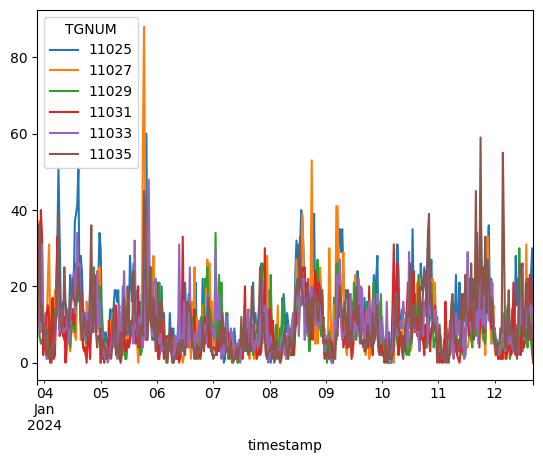

In [68]:
tgFreq.head()
subset_df = tgFreq[[11025,11027,11029,11031,11033,11035]]

subset_df.plot()


<Axes: xlabel='timestamp'>

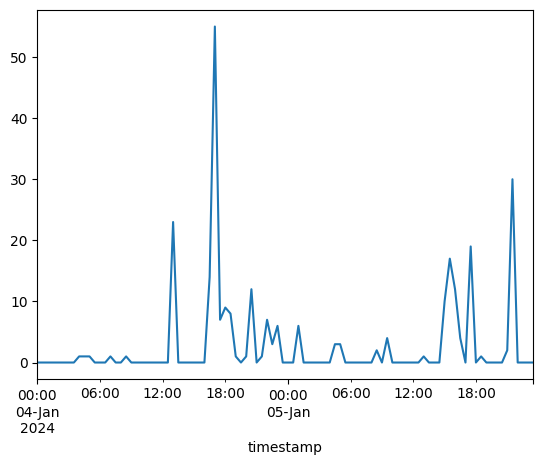

In [77]:
start_date = '2024-01-04'
end_date = '2024-01-05'
tgFreq.head()
# Filter data between two dates
tgFreq[start_date:end_date][700].plot()



#### What a Day looks like

<Axes: xlabel='time'>

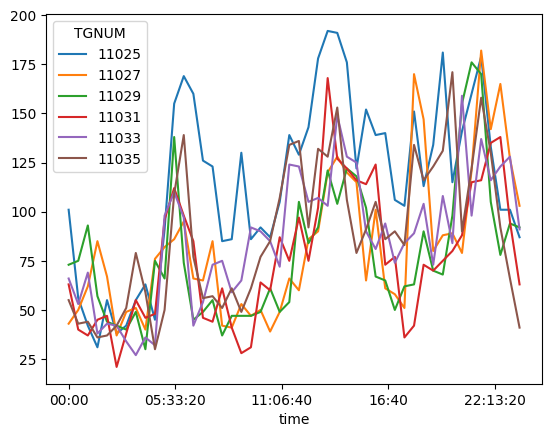

In [69]:
tgSum = tgFreq.groupby(tgFreq.index.time).sum()
tgFreq.head()
subset_df = tgSum[[11025,11027,11029,11031,11033,11035]]

subset_df.plot()

## Radio Unit TG Affilitaion

In [78]:
TABLE_NAME = "AFFILIATIONS"
with conn:
    print("Database connected:")
    df = fetch_table_data_into_df(TABLE_NAME, conn)
    # reading what you want to do, I presumed you want 
    # to plot per measuremnt
    df['timestamp'] = (pd.to_datetime(df['DATETIME'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('America/New_York')) 

Database connected:


In [79]:
tgAffil = (df.groupby([pd.Grouper(key='timestamp', freq='30min'), 'TGNUM'])
       .size()
       .unstack(fill_value=0))
#tgAffil.groupby(tgAffil.index.time).sum()

<Axes: xlabel='timestamp'>

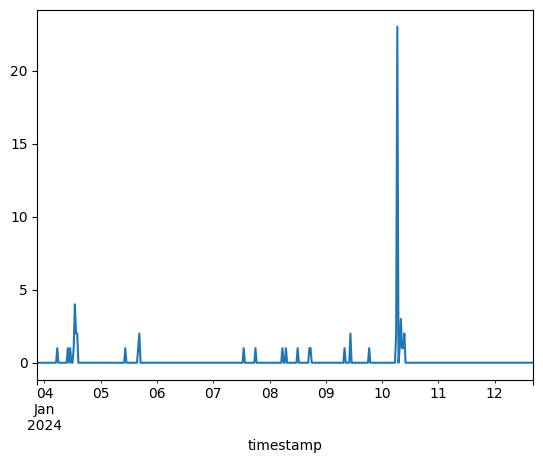

In [80]:
start_date = '2024-01-04'
end_date = '2024-01-05'
# Filter data between two dates
#tgAffil[start_date:end_date][700].plot()
tgAffil[11151].plot()



## Which Units Affiliated with Which Talkgroups

In [109]:
TABLE_NAME = "AFFILIATIONS"
with conn:
    print("Database connected:")
    df = fetch_table_data_into_df(TABLE_NAME, conn)
    # reading what you want to do, I presumed you want 
    # to plot per measuremnt
    df['timestamp'] = (pd.to_datetime(df['DATETIME'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('America/New_York')) 

Database connected:


In [111]:
interested_units = df[df['TGNUM']==11151]
# Create an empty list 
unit_list =[] 
  
# Iterate over each row 
for index, rows in interested_units.iterrows(): 
    # Create list for the current row 
       # check if exists in unique_list or not
    if rows.SOURCEID not in unit_list:
        unit_list.append(rows.SOURCEID) 
    # append the list to the final list 


unit_list

[1102722,
 1111218,
 1111182,
 1111150,
 1102787,
 1110846,
 1111190,
 1102736,
 1103288,
 1111116,
 1102718,
 1102766,
 1102729,
 1102695,
 1102748,
 1111195,
 1102723,
 1102685,
 1110799,
 1103692,
 1102765,
 1102728,
 1102745,
 1111253,
 1102756,
 1111368,
 1102750,
 1102727,
 1267684,
 1267746,
 1102785,
 1102651,
 1102647,
 1102784,
 1102710,
 1102783,
 1102726,
 1102780,
 1102711,
 1105798,
 1111215,
 1111494,
 1110763,
 1102713]

## Unit Registration

In [99]:
TABLE_NAME = "UNITS"
with conn:
    print("Database connected:")
    df = fetch_table_data_into_df(TABLE_NAME, conn)
    # reading what you want to do, I presumed you want 
    # to plot per measuremnt
    df['timestamp'] = (pd.to_datetime(df['DATETIME'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('America/New_York')) 

Database connected:


In [106]:
filtered_df = df[(df['SOURCEID'].isin(unit_list)) & (df['REGISTER'] == 1)] # df['REGISTER'] == 1, 
binned_df = filtered_df.groupby(pd.Grouper(key='timestamp', freq='30min')).size()
print(binned_df)



timestamp
2024-01-03 22:00:00-05:00    2
2024-01-03 22:30:00-05:00    0
2024-01-03 23:00:00-05:00    0
2024-01-03 23:30:00-05:00    0
2024-01-04 00:00:00-05:00    0
                            ..
2024-01-12 13:00:00-05:00    1
2024-01-12 13:30:00-05:00    3
2024-01-12 14:00:00-05:00    2
2024-01-12 14:30:00-05:00    0
2024-01-12 15:00:00-05:00    3
Freq: 30T, Length: 419, dtype: int64


<Axes: xlabel='timestamp'>

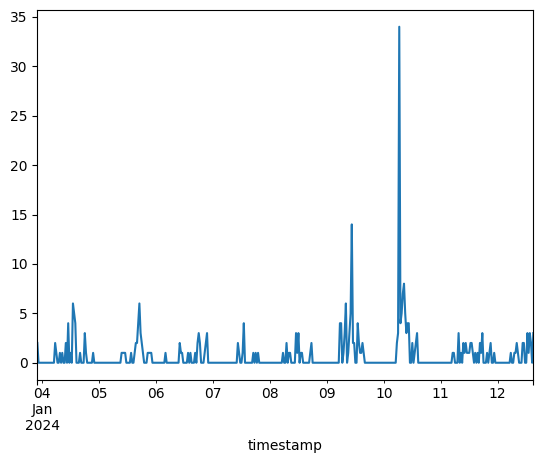

In [107]:
binned_df.plot()

In [12]:
unitReg = (df.groupby([pd.Grouper(key='timestamp', freq='30min'), 'REGISTER'])
       .size()
       .unstack(fill_value=0))
unitReg.groupby(unitReg.index.time).sum()

REGISTER,0,1
00:00:00,954,830
00:30:00,843,702
01:00:00,802,741
01:30:00,792,776
02:00:00,676,572
02:30:00,597,579
03:00:00,616,543
03:30:00,739,539
04:00:00,831,744
04:30:00,1065,1103


<Axes: xlabel='timestamp'>

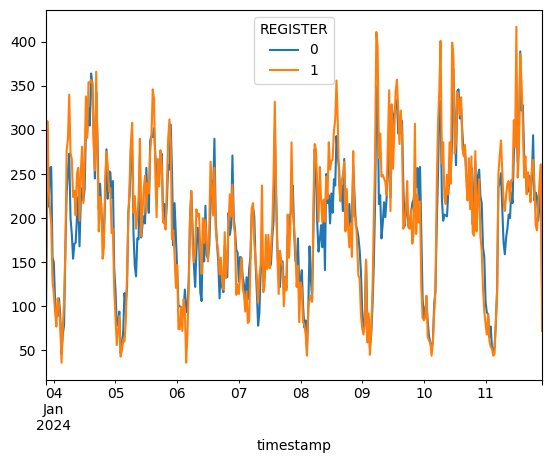

In [13]:
unitReg.plot()